# Extract EEG signals from a dataset for seizure detection


# Import Libraries


In [136]:
import numpy as np
import os
import pandas
import matplotlib
import matplotlib.pyplot as plt

import mne
from mne.filter import notch_filter


# Locate Data

https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py


In [137]:
# Set data location
DEV_DATA_FOLDER = "E:/edf/dev"


# Set absence file names
ABSENCE_FILES_NAMES = []
with open(r"processed_data\absence\absence_files.txt", "r") as f:
    for i in f.readlines():
        ABSENCE_FILES_NAMES.append(DEV_DATA_FOLDER + i[:-1])


In [138]:
raw = mne.io.read_raw_edf(ABSENCE_FILES_NAMES[1])


Extracting EDF parameters from E:\edf\dev\02_tcp_le\036\00003635\s001_2006_07_20\00003635_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


## Load Data


In [139]:
raw.load_data()


Reading 0 ... 404499  =      0.000 ...  1617.996 secs...


Measurement date,"July 20, 2006 15:40:00 GMT"
Experimenter,Unknown
Participant,00003635
Digitized points,Not available
Good channels,33 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [140]:
raw.plot()


In [141]:
data = raw.get_data()
info = raw.info
frequency = raw.info["sfreq"]

raw.notch_filter(60)

raw.plot()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



Creating RawArray with float64 data, n_channels=33, n_times=404500
    Range : 0 ... 404499 =      0.000 ...  1617.996 secs
Ready.


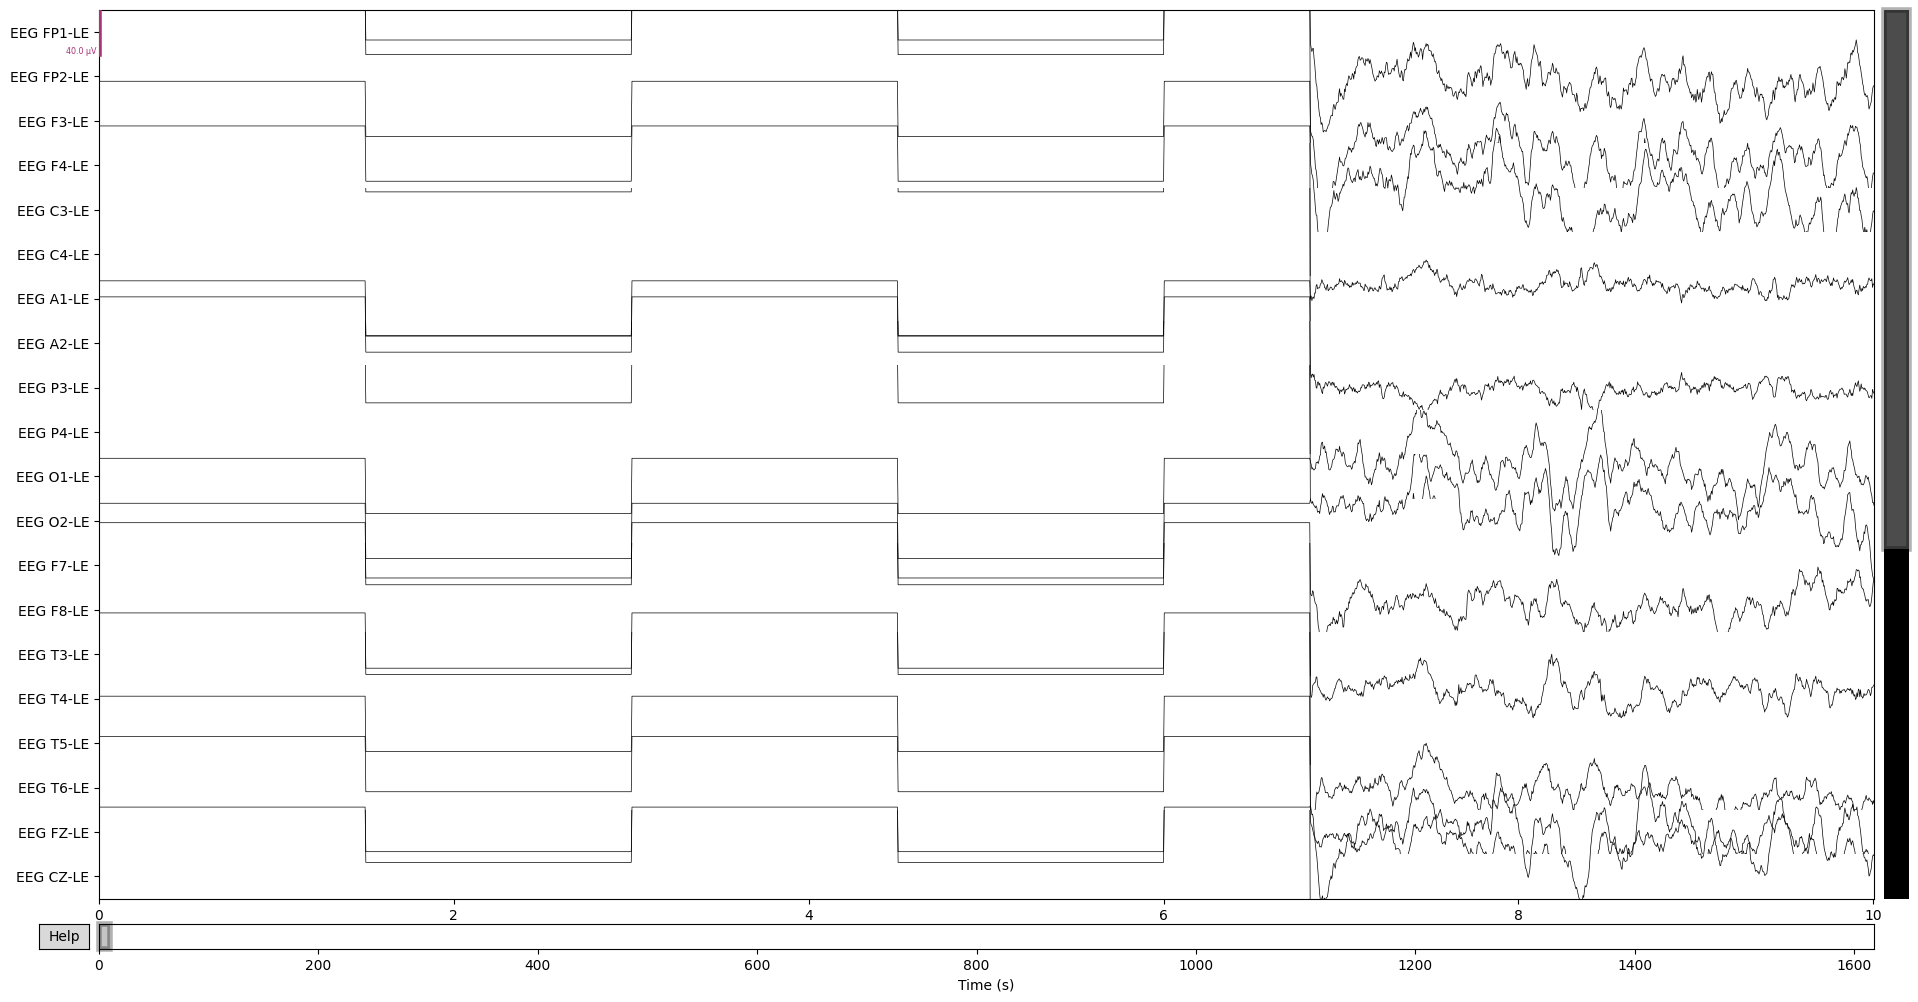

In [142]:
post_raw = mne.io.RawArray(data, info)
post_raw.plot()
